In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(13, 182)
(13,)


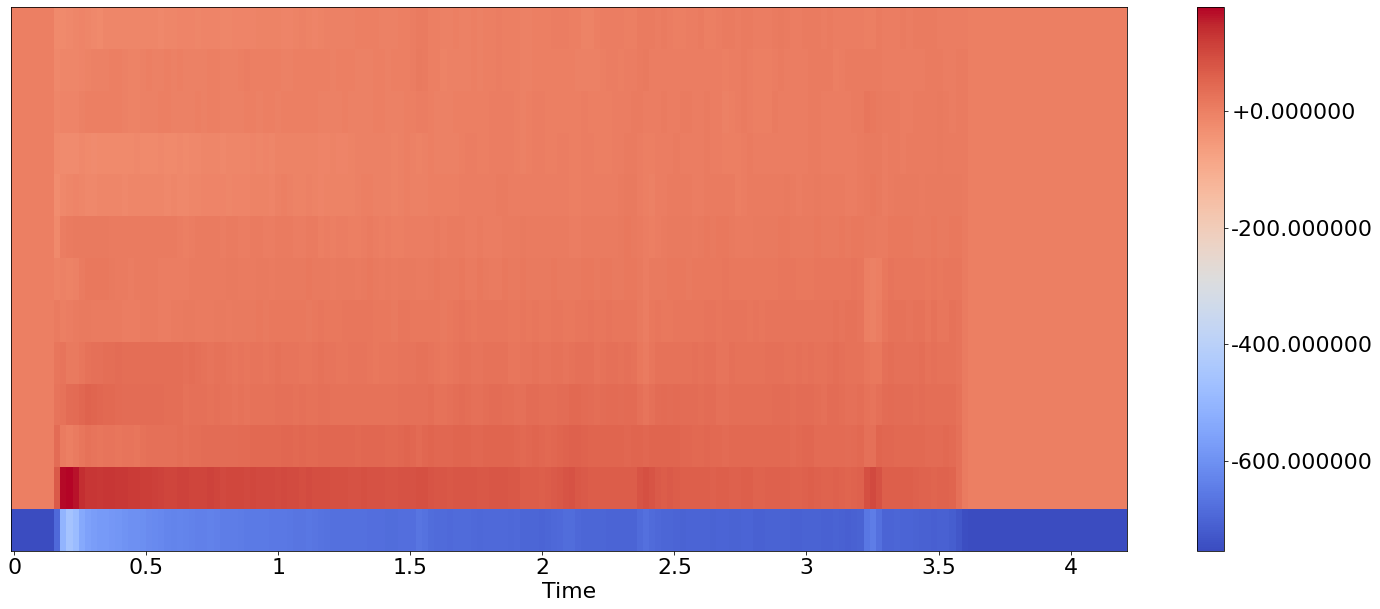

In [3]:
source = "/Users/Kaede/Desktop/final_project/wav_files/guitar/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
signal, sr = librosa.load(files[1])
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
print(mfccs.shape)
mean_mfccs = np.mean(mfccs, axis=1)
print(mean_mfccs.shape)
# visualize mfccs
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs,x_axis='time',sr=sr)
plt.colorbar(format="%+1f")
plt.rcParams.update({'font.size': 22})
plt.show()

### prepare the data

In [13]:
X_train = []
X_test = []
y_train = []
y_test = []

In [14]:
# data split (0.7)
# guitar(0):  74   
# flute(1):  618
# violin(2):  1051
# clarinet(3):  592
# trumpet(4):  339
# cello(5):  622
# saxophone(6):  512

In [15]:
source = "/Users/Kaede/Desktop/final_project/wav_files/guitar/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    signal, sr = librosa.load(files[i])
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
    mean_mfccs = np.mean(mfccs, axis=1)
    if i < 74:
        X_train.append(mean_mfccs)
        y_train.append(0)
    else:
        X_test.append(mean_mfccs)
        y_test.append(0)

In [16]:
source = "/Users/Kaede/Desktop/final_project/wav_files/flute/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    signal, sr = librosa.load(files[i])
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
    mean_mfccs = np.mean(mfccs, axis=1)
    if i < 618:
        X_train.append(mean_mfccs)
        y_train.append(1)
    else:
        X_test.append(mean_mfccs)
        y_test.append(1)

In [17]:
source = "/Users/Kaede/Desktop/final_project/wav_files/violin/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    signal, sr = librosa.load(files[i])
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
    mean_mfccs = np.mean(mfccs, axis=1)
    if i < 1051:
        X_train.append(mean_mfccs)
        y_train.append(2)
    else:
        X_test.append(mean_mfccs)
        y_test.append(2)

In [18]:
source = "/Users/Kaede/Desktop/final_project/wav_files/clarinet/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    signal, sr = librosa.load(files[i])
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
    mean_mfccs = np.mean(mfccs, axis=1)
    if i < 592:
        X_train.append(mean_mfccs)
        y_train.append(3)
    else:
        X_test.append(mean_mfccs)
        y_test.append(3)

In [19]:
source = "/Users/Kaede/Desktop/final_project/wav_files/trumpet/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    signal, sr = librosa.load(files[i])
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
    mean_mfccs = np.mean(mfccs, axis=1)
    if i < 339:
        X_train.append(mean_mfccs)
        y_train.append(4)
    else:
        X_test.append(mean_mfccs)
        y_test.append(4)

In [20]:
source = "/Users/Kaede/Desktop/final_project/wav_files/cello/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    signal, sr = librosa.load(files[i])
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
    mean_mfccs = np.mean(mfccs, axis=1)
    if i < 622:
        X_train.append(mean_mfccs)
        y_train.append(5)
    else:
        X_test.append(mean_mfccs)
        y_test.append(5)

In [21]:
source = "/Users/Kaede/Desktop/final_project/wav_files/saxophone/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
for i in range(len(files)):
    signal, sr = librosa.load(files[i])
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
    mean_mfccs = np.mean(mfccs, axis=1)
    if i < 512:
        X_train.append(mean_mfccs)
        y_train.append(6)
    else:
        X_test.append(mean_mfccs)
        y_test.append(6)

In [4]:
import numpy as np
with open('X_test.npy', 'rb') as f:
    X_test = np.load(f)
with open('y_test.npy', 'rb') as f:
    y_test = np.load(f)
with open('X_train.npy', 'rb') as f:
    X_train = np.load(f)
with open('y_train.npy', 'rb') as f:
    y_train = np.load(f)

## train the data using svm

In [6]:
from sklearn import svm
from datetime import datetime 
start = datetime.now()
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Training completed in time:  0:00:00.532311


## test the data using svm

In [7]:
y_predict = np.array(clf.predict(X_test))
y_test = np.array(y_test)
accuracy = np.sum(y_predict == y_test) / len(y_predict)
print(accuracy)

0.7334963325183375


In [45]:
diff = []
for i in range(len(y_predict)):
    if y_predict[i] != y_test[i]:
        diff.append((y_test[i], y_predict[i]))
from collections import Counter

keys = Counter(diff).keys()
values = Counter(diff).values()
print(keys)
print(values)
print(list(values).index(max(list(values))), list(keys)[list(values).index(max(list(values)))])


dict_keys([(0, 2), (0, 1), (0, 5), (1, 3), (1, 2), (1, 6), (2, 1), (2, 6), (2, 0), (3, 5), (3, 6), (3, 2), (3, 4), (3, 1), (4, 6), (4, 3), (4, 1), (4, 2), (4, 5), (5, 2), (6, 1), (6, 5), (6, 2), (6, 3), (6, 4)])
dict_values([6, 13, 1, 29, 13, 7, 16, 1, 1, 25, 31, 24, 1, 5, 69, 15, 19, 6, 1, 76, 6, 13, 19, 36, 3])
19 (5, 2)


In [46]:
# violin & cello

In [47]:
# save the processed data into files
with open('/Users/Kaede/Desktop/final_project/X_test.npy', 'wb') as f:
    np.save(f, np.array(X_test))
with open('/Users/Kaede/Desktop/final_project/X_train.npy', 'wb') as f:
    np.save(f, np.array(X_train))
with open('/Users/Kaede/Desktop/final_project/y_test.npy', 'wb') as f:
    np.save(f, np.array(y_test))
with open('/Users/Kaede/Desktop/final_project/y_train.npy', 'wb') as f:
    np.save(f, np.array(y_train))